In [13]:
#Sihao Ren // sren03 // 947105531
using Flux
using Statistics
using Flux: onehotbatch, onecold, crossentropy
using Base.Iterators: repeated
using MLJBase
using Printf
using BSON: @save # for save weights
using Plots

In [14]:
using DelimitedFiles

In [15]:
rawdata = readdlm("data/test2.csv")';

In [72]:
rawdata

20×1340 adjoint(::Matrix{Float64}) with eltype Float64:
 36.0  35.0  74.0  58.0  48.0  75.0  …  80.0  80.0  68.0  43.0  52.0  47.0
 27.4  26.9  15.3  11.6  11.5  11.4     15.8  15.8  12.6  12.1  12.0  11.7
  7.4   7.2   5.2   5.7   4.5   3.7      4.3   4.3   3.9   5.4   4.5   4.4
  2.6   2.0   2.0   2.3   1.6   1.5      1.6   1.6   1.5   2.2   1.7   1.6
  7.6   6.7   4.7   5.5   3.0   3.5      3.6   3.6   4.1   3.9   3.8   4.4
 34.7  29.6  42.2  42.6  52.4  42.3  …  43.3  43.3  35.8  55.0  43.9  36.9
  0.5   0.7   0.4   0.1   0.0   0.3      0.0   0.0   0.1   0.0   0.0   0.4
  2.1   2.8   1.7   0.5   0.1   1.1      0.2   0.2   0.7   0.0   0.2   1.3
 25.0  23.5  24.4  22.6   0.0  32.5     14.3  14.3  16.7   0.0  10.0  33.3
  1.6   2.6   0.9   0.9   1.3   0.4      1.2   1.2   0.8   1.0   1.2   0.7
  2.3   3.4   1.3   1.3   1.9   0.5  …   1.5   1.5   1.0   1.6   1.8   1.0
 69.9  76.5  67.0  68.9  67.4  73.2     79.2  79.2  79.4  64.3  62.5  67.3
  0.7   0.5   0.5   1.0   1.0   0.2      0.4

In [81]:
x = rawdata[:,1];
x
test = hcat(rawdata, x)
test

20×1341 Matrix{Float64}:
 36.0  35.0  74.0  58.0  48.0  75.0  …  80.0  68.0  43.0  52.0  47.0  36.0
 27.4  26.9  15.3  11.6  11.5  11.4     15.8  12.6  12.1  12.0  11.7  27.4
  7.4   7.2   5.2   5.7   4.5   3.7      4.3   3.9   5.4   4.5   4.4   7.4
  2.6   2.0   2.0   2.3   1.6   1.5      1.6   1.5   2.2   1.7   1.6   2.6
  7.6   6.7   4.7   5.5   3.0   3.5      3.6   4.1   3.9   3.8   4.4   7.6
 34.7  29.6  42.2  42.6  52.4  42.3  …  43.3  35.8  55.0  43.9  36.9  34.7
  0.5   0.7   0.4   0.1   0.0   0.3      0.0   0.1   0.0   0.0   0.4   0.5
  2.1   2.8   1.7   0.5   0.1   1.1      0.2   0.7   0.0   0.2   1.3   2.1
 25.0  23.5  24.4  22.6   0.0  32.5     14.3  16.7   0.0  10.0  33.3  25.0
  1.6   2.6   0.9   0.9   1.3   0.4      1.2   0.8   1.0   1.2   0.7   1.6
  2.3   3.4   1.3   1.3   1.9   0.5  …   1.5   1.0   1.6   1.8   1.0   2.3
 69.9  76.5  67.0  68.9  67.4  73.2     79.2  79.4  64.3  62.5  67.3  69.9
  0.7   0.5   0.5   1.0   1.0   0.2      0.4   0.4   1.5   0.2   0.2   0.7


In [82]:
test = test[ :, shuffle(1:end)]

20×1341 Matrix{Float64}:
 45.0  79.0  38.0  53.0  54.0  81.0  …  59.0  82.0  47.0  75.0  11.0  66.0
 10.4  37.7   7.3  12.4  25.1  33.3     12.8  27.4  16.6  17.4  10.6  27.9
  3.7  18.0   2.9   4.3   8.6  13.6      5.1   7.2   4.6   4.5   2.4  11.7
  1.7   6.9   1.2   1.3   3.4   5.1      1.9   3.2   1.6   1.7   1.1   3.6
  4.1  16.5   2.7   3.6   8.0  13.0      4.6   7.0   4.5   3.1   1.8   8.9
 40.8  42.2  45.5  36.5  41.9  39.4  …  41.6  45.0  36.2  55.7  60.0  40.8
  0.1   0.0   0.1   0.1   0.5   1.5      0.0   0.0   0.4   0.0   0.0   0.3
  0.3   0.1   0.3   0.5   1.5   4.5      0.1   0.2   1.4   0.0   0.0   1.3
 20.0  27.3  41.7  25.9  32.9  33.8      0.0   7.7  26.6   0.0   0.0  20.2
  0.3   4.1   0.3   1.6   1.4   1.9      1.2   0.8   1.0   1.1   0.2   4.2
  0.4   5.5   0.6   1.9   2.4   2.4  …   1.7   1.2   1.2   1.6   0.5   4.8
 60.0  73.6  59.1  80.6  61.4  78.1     70.6  71.1  82.5  70.8  33.3  87.3
  0.1   2.4   0.3   0.2   1.1   0.6      0.8   1.3   0.3   1.5   1.5   0.8


In [18]:
y = rawdata[20, :]

1340-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0

In [19]:
split_ratio = 0.7

0.7

In [21]:
1340*0.7

937.9999999999999

In [22]:
size(x,2)

1340

In [29]:
x_train = x[:,1:938]
y_train = y[1:938]
x_test = x[:,939:end]
y_test = y[939:end];

938-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [34]:
tempy = []
for i in y_train
    if i == 0
        push!(tempy,0)
    else
        push!(tempy,1)
    end
    end
y_train = tempy
y_train = Flux.onehotbatch(y_train, 0:1)

tempy = []
for i in y_test
    if i == 0
        push!(tempy,0)
    else
        push!(tempy,1)
    end
    end
y_test = tempy
y_test = Flux.onehotbatch(y_test, 0:1);

In [67]:
loss(x, y) = crossentropy(model(x), y) 
dataset = repeated((x_train,y_train),1);
dataset2 = repeated((x_test,y_test),1);
optim = ADAM()
myaccuracy(x, y) = mean(onecold(model(x)) .== onecold(y))


myaccuracy (generic function with 1 method)

In [56]:
epochs = 50 # the number of epochs

save_resultTest = zeros(epochs);
save_resultTrain = zeros(epochs);

In [17]:
weights = rand(2*19,19)
bias = rand(2*19)
a = Dense(weights, bias, sigmoid)
model = Chain(a, Dense(2*19, 2), softmax)
savepath = string("models/model",1,".bson")
@save savepath model


In [68]:
model = Chain(Dense(19, 2*19, sigmoid), Dense(2*19, 2), softmax)
save_resultTest = []
save_resultTrain =[]

Any[]

In [69]:
for i in 1:50000
    Flux.train!(loss, Flux.params(model), dataset2, optim)
    push!(save_resultTest, myaccuracy(x_test, y_test))
    push!(save_resultTrain, myaccuracy(x_train, y_train))
end

In [24]:
for i in 1:10
    weights = rand(2*19,19)
    bias = rand(2*19)
    a = Dense(weights, bias, sigmoid)
    model = Chain(a, Dense(2*19, 2), softmax)
    #model = Chain(Dense(19, 2*19, sigmoid), Dense(2*19, 2), softmax)
    savepath = string("models/model",i,".bson")
    @save savepath model
    for j in 1:epochs
        Flux.train!(loss, Flux.params(model), dataset, optim)
        #@printf("Loss in epoch: %d in test is %f\n", j, loss(x_test, y_test))
        save_resultTest[i] = save_resultTest[i] + myaccuracy(x_test, y_test)
        save_resultTrain[i] = save_resultTrain[i] + myaccuracy(x_train, y_train)
    end
    
end


In [25]:
save_resultTest = save_resultTest ./ 10
save_resultTrain = save_resultTrain ./ 10

50-element Vector{Float64}:
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 3.0000000000000027
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [51]:
epochs

5000

In [62]:
save_resultTest
test = save_resultTest[500001:end]
train = save_resultTrain[500001:end]


500000-element Vector{Float64}:
 0.8869936034115139
 0.8880597014925373
 0.8869936034115139
 0.8891257995735607
 0.8859275053304904
 0.8891257995735607
 0.8859275053304904
 0.8891257995735607
 0.8880597014925373
 0.8880597014925373
 0.8923240938166311
 0.8869936034115139
 0.894456289978678
 ⋮
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433
 0.9701492537313433

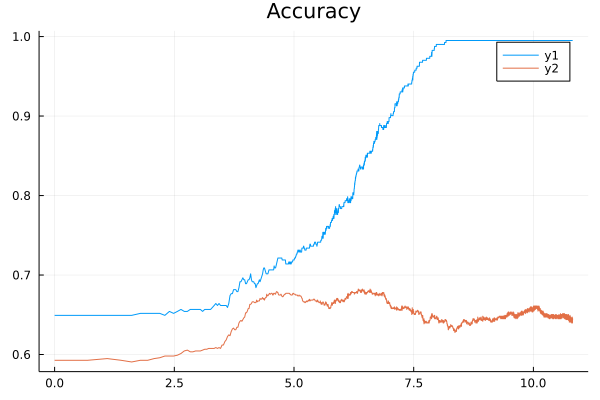

In [71]:
plot(log.(1:50000), save_resultTest)
plot!(log.(1:50000), save_resultTrain, title = "Accuracy")